Research Question: What is the relationship between racial composition and socio-economic inequality with COVID-19 mortality rates in the US?

# INTRODUCTION

Write a brief introduction of your project (one or two paragraphs), source of the data, and important background necessary to understand your project (Keep it short. You will complete it over time). An outsider should be able to understand what you are trying to do in this project. Clearly explain Y (outcome) and at least two X.

Y variable: US COVID-19 mortality rates
X variable 1: Race/ethnithity
X variable 2: socio-economic inequality
X1 & X2 are correlated

 ## Data Cleaning
 We limited our analysis to the 50 states in the US from January, 2020, through December, 2020.

Import packages and load dataset

In [432]:
!pip install pandas plotnine

In [434]:
# import packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import plotnine
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import ggplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [365]:
# load dataset

# confirmed_df = pd.read_csv("time_series_covid19_confirmed_US.csv", sep = ",")
deaths_df = pd.read_csv("time_series_covid19_deaths_US.csv", sep = ",")
gini_df = pd.read_csv("Gini_Household Income for States- 2009 to 2010.csv", sep = ",")
# race_pop_df = pd.read_csv("race pop by states.csv", sep = ",")
# unemployment_df = pd.read_csv("unemployment by states.csv", sep = ",")
# poverty_df = pd.read_csv("poverty rate.csv", sep = ",")
demographics_df = pd.read_csv("acs2017_census_tract_data.csv", sep = ",")

Import the data and call them in JupyterNotebook

In [19]:
# Read the data on Jupyter Notebook. 
# Browse through the uploaded data
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 754 entries, UID to 2/2/22
dtypes: float64(3), int64(745), object(6)
memory usage: 19.2+ MB


## Data Cleaning Part 1

In [21]:
# Using demographics_df dataset to get its columns 
list(demographics_df)

['TractId',
 'State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [39]:
# Get info about how many counties in each state.

# Isolate unique values in "State" 
print(set(demographics_df['State']))

# counts number of counties in each state
county = demographics_df[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)
county.sort_index()
county.drop(["District of Columbia", "Puerto Rico"])

{'Wyoming', 'Wisconsin', 'Missouri', 'New Mexico', 'Mississippi', 'Massachusetts', 'Nebraska', 'Kansas', 'Rhode Island', 'North Carolina', 'Florida', 'Arizona', 'California', 'New Hampshire', 'Indiana', 'District of Columbia', 'Utah', 'Louisiana', 'Alaska', 'Connecticut', 'Puerto Rico', 'Colorado', 'Washington', 'Michigan', 'Illinois', 'Montana', 'Oregon', 'Minnesota', 'New Jersey', 'Oklahoma', 'Maine', 'Ohio', 'Iowa', 'Virginia', 'Maryland', 'South Dakota', 'West Virginia', 'Alabama', 'North Dakota', 'Hawaii', 'Delaware', 'Arkansas', 'Georgia', 'Tennessee', 'South Carolina', 'Texas', 'Nevada', 'Kentucky', 'New York', 'Vermont', 'Idaho', 'Pennsylvania'}


,County
State,
Alabama,1181
Alaska,167
Arizona,1526
Arkansas,686
California,8057
Colorado,1249
Connecticut,833
Delaware,218
Florida,4245


In [419]:
# Create a new dataset which contains data of 50 states with state-level population, racial compositions and 
# two important inquality indexes including 'Hispanic', 'White', 'Black', 'Native', 'Asian',
# 'Pacific', 'TotalPop', 'Poverty', and 'Unemployment'.

# group by state 
agg_demo_df = demographics_df.groupby('State').sum()
race = agg_demo_df.loc[:,"Hispanic":"Pacific"]
#race
# Write a function, given a DataFrame that compute each entry's proportion from its state population
#def convert_to_proportion(agg_demo_df):
#    demo_renamed = agg_demo_df.rename(columns={'Hispanic':"Hispanic %", 'White':"White %", 'Black':'Black %','Native':"Native %", 'Asian':"Asian %",'Pacific':"Pacific %"})
 #   return demo_renamed/agg_demo_df['TotalPop']


#gbstate = agg_demo_df.groupby('State').sum()

#gbstate.apply(convert_to_proportion)

#agg_demographics_df.loc[:,"Hispanic":"Pacific"]


total_pop = agg_demo_df.get("TotalPop").to_frame()
total_pop
#unemployment = agg_demo_df.get("Unemployment")
#poverty = agg_demo_df.get("Poverty")


demo_result = pd.concat([total_pop, race], axis = 1)
demo_result

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific
State,,,,,,,
Alabama,4850771,4524.0,72091.3,37170.5,531.6,1262.6,33.8
Alaska,738565,1036.2,9896.8,446.2,2837.5,938.1,182.4
Arizona,6809946,45584.9,85641.3,5855.7,6683.3,4505.7,261.0
Arkansas,2977944,4418.9,48141.6,13162.0,367.4,818.6,103.2
California,38982847,302436.7,315375.1,44892.6,3313.3,107156.8,2759.2
Colorado,5436519,26172.2,86278.9,4357.6,735.4,3438.6,161.7
Connecticut,3594478,13426.5,55175.2,8681.9,117.4,3432.7,15.3
Delaware,943732,1927.4,13631.2,4512.9,66.3,755.5,4.6
District of Columbia,672391,1770.6,6143.4,8887.8,31.2,615.4,6.2


## Data Cleaning Part 2

In [314]:
# Browse through the US COVID deaths Database
deaths_df.head()
# Get the total COVID-19 deaths in each of the 50 states as well as the daily death number from 
# March 15 to December 15 in 2020.

deaths = deaths_df.set_index("Province_State").loc[:, '3/15/20':'12/15/20']
deaths_state = deaths.groupby('Province_State', as_index=True).sum()
deaths_total = deaths_state.sum(axis=1)
pop = deaths_df.set_index("Province_State").loc[:, "Population"]
pop = pop.groupby('Province_State',as_index=True).sum()


# Combine the total death levels in each state with daily deaths during the selected period based on state.
deaths_result = pd.concat([pop, deaths_total, deaths_state], axis = 1)

deaths_result = deaths_result.drop(['American Samoa', 'District of Columbia', 'Grand Princess', 'Diamond Princess', 'Northern Mariana Islands','Puerto Rico', 'Virgin Islands','Guam'])
deaths_update = deaths_result.rename(columns={deaths_result.columns[1]: 'Total COVID-19 Deaths'})
deaths_update.index.names = ['State']
 
# Compute the state-level Mortality rate using "COVID-19 Mortality Rate" divided by "Population"
deaths_update["COVID-19 Mortality Rate"] = deaths_update["Total COVID-19 Deaths"]/deaths_update["Population"]

# shift column 'COVID-19 Mortality Rate' to third position
third_column = deaths_update.pop('COVID-19 Mortality Rate')
# insert column into the table
deaths_update.insert(2, 'COVID-19 Mortality Rate', third_column)
deaths_clean = deaths_update
deaths_clean

# Data Cleaning Completed

,Population,Total COVID-19 Deaths,COVID-19 Mortality Rate,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,453619,0.092515,0,0,0,0,0,0,0,...,3889,3892,3942,3985,4034,4086,4102,4102,4102,4124
Alaska,740995,11056,0.014920,0,0,0,0,0,0,0,...,143,146,146,150,155,158,176,176,176,179
Arizona,7278717,916725,0.125946,0,0,0,0,0,0,1,...,6950,6950,6973,7081,7154,7245,7322,7357,7358,7422
Arkansas,3017804,231873,0.076835,0,0,0,0,0,0,0,...,2660,2713,2752,2786,2820,2875,2911,2945,2990,3016
California,39512223,2662978,0.067396,6,6,8,16,20,23,26,...,20007,20067,20238,20439,20604,20793,20971,21063,21154,21390
Colorado,5758736,467526,0.081186,2,2,3,3,5,5,6,...,3356,3358,3372,3639,3759,3846,3871,3958,3969,4085
Connecticut,3565287,1027996,0.288335,0,0,0,1,3,4,4,...,5146,5224,5242,5285,5327,5363,5363,5363,5444,5466
Delaware,973764,143920,0.147798,0,0,0,0,0,0,0,...,849,854,857,870,876,880,887,900,906,913
Florida,21477737,2297786,0.106985,3,3,5,7,9,11,13,...,19177,19282,19378,19462,19591,19714,19785,19866,20003,20082


## Data Cleaning Part 3

In [370]:
# Browse through the Gini Index of 50 US states in 2010 derived from the 2010 American Community Survey.
gini_df
# Drop the data for District of Columbia to get data of 50 states
gini = gini_df.drop([8])
gini_clean = gini.set_index("State")
gini_clean

# Data Cleaning Completed

,2010 ACS Gini index
State,
Alabama,0.472
Alaska,0.422
Arizona,0.455
Arkansas,0.458
California,0.471
Colorado,0.457
Connecticut,0.486
Delaware,0.440
Florida,0.474


# Methods

This research examined the association between income inequality and the number of COVID-19 deaths. The state-level income inequality data was measured by the Gini index extracted from the 2010 American Community Survey. The number of deaths was calculated using the COVID-19 Dashboard, a data set hosted by the Center for Systems Science and Engineering at Johns Hopkins University. Most importantly, this analysis only focuses on the 50 states and using data from March 15, 2020, through December 15, 2020.

First, use umployment and poverty to illustra
We can see a higher poverty rate from counties with larger Unemployment rate. 


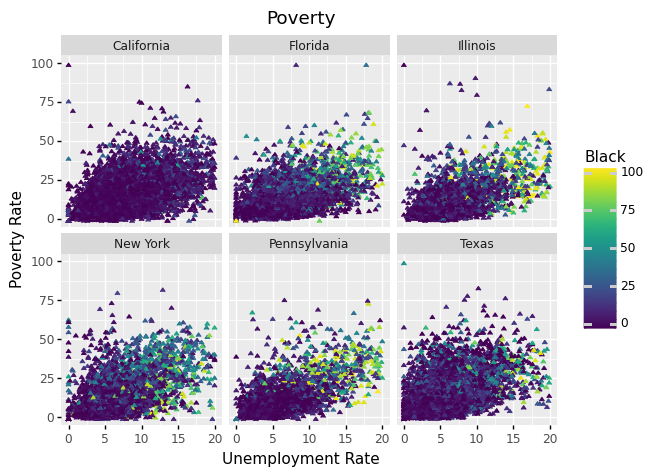

<ggplot: (8778405193388)>

In [440]:
# group by state 
agg_df = demographics_df.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

# Create a new dataset which contains data of states with top 5 total population
ca = demographics_df.groupby('State').get_group('California')
tx = demographics_df.groupby('State').get_group('Texas')
ny = demographics_df.groupby('State').get_group('New York')
fl = demographics_df.groupby('State').get_group('Florida')
il = demographics_df.groupby('State').get_group('Illinois')
pn = demographics_df.groupby('State').get_group('Pennsylvania')
df_6 = pd.concat([ca,tx,ny,fl,il,pn])
df_6.head()

from plotnine import *

ggplot(df_6, aes(x='Unemployment', y='Poverty',color='Black')) + \
      geom_point(shape = 6) + \
      xlim(0, 20) + \
      xlab('Unemployment Rate') + ylab('Poverty Rate') + ggtitle('Poverty') + \
      facet_wrap("State")

we performed simple correlation analyses between the state-level Gini index and the number of cases and deaths per 100,000 population due to COVID-19 using the Spearman rank-order correlation test

### Reference:
    Household Income for States: 2009 to 2010: 
            https://www2.census.gov/library/publications/2011/acs/acsbr10-02.pdf
            (Sources: U .S . Census Bureau, 2009 and 2010 American Community Surveys)
    US Census Demographic Data：
            https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2017_census_tract_data.csv